In [1]:
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx

/home/wooj/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



In [2]:
import pandas as pd
import pickle

In [5]:
df = pd.read_csv('combined_data.csv')
df = df.drop(df.columns[[0, 100]], axis=1)
df.head()

,abdominal_hernia,acute_respiratory_infections,anemia,appendicitis,arteries_diseases,arthropathies,benign_neoplasm,bone_neoplasm,carcinoma_in_situ,cerebrovascular_disease,...,supplementary_classification,symptoms,syphilis_venereal,thyroid_diseases,tuberculosis,uncertain_neoplasm,unspecified_neoplasm,vein_lymphatics_diseases,viral_diseases_exanthem,zoonotic_bacterial_diseases
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
# For each diagnosis, count how many other diagnoses were given to each patient
adj_matrix = pd.DataFrame(columns=df.columns)
j = 0

for i in df:
    temp = df[df[i] == 1]
    adj = temp.sum(axix=0)
    adj_matrix.loc[j] = adj
    j += 1

adj_matrix.head()

,abdominal_hernia,acute_respiratory_infections,anemia,appendicitis,arteries_diseases,arthropathies,benign_neoplasm,bone_neoplasm,carcinoma_in_situ,cerebrovascular_disease,...,supplementary_classification,symptoms,syphilis_venereal,thyroid_diseases,tuberculosis,uncertain_neoplasm,unspecified_neoplasm,vein_lymphatics_diseases,viral_diseases_exanthem,zoonotic_bacterial_diseases
0,178,86,26,0,16,55,5,6,1,13,...,85,108,0,24,0,9,0,24,12,0
1,86,3354,252,4,116,998,134,41,11,75,...,1555,2193,6,377,11,75,5,244,188,0
2,26,252,696,2,58,277,34,19,6,35,...,299,494,1,148,1,16,0,94,29,0
3,0,4,2,8,0,3,2,0,1,1,...,2,7,0,1,0,0,0,1,0,0
4,16,116,58,0,395,145,14,8,2,49,...,152,244,1,56,3,7,2,65,12,0


In [7]:
# Normalize by max in row
normalized_adj_matrix = adj_matrix.divide(adj_matrix.max(axis=1), axis=0)
normalized_adj_matrix.head()

,abdominal_hernia,acute_respiratory_infections,anemia,appendicitis,arteries_diseases,arthropathies,benign_neoplasm,bone_neoplasm,carcinoma_in_situ,cerebrovascular_disease,...,supplementary_classification,symptoms,syphilis_venereal,thyroid_diseases,tuberculosis,uncertain_neoplasm,unspecified_neoplasm,vein_lymphatics_diseases,viral_diseases_exanthem,zoonotic_bacterial_diseases
0,1.000000,0.483146,0.146067,0.000000,0.089888,0.308989,0.028090,0.033708,0.005618,0.073034,...,0.477528,0.606742,0.000000,0.134831,0.000000,0.050562,0.000000,0.134831,0.067416,0
1,0.025641,1.000000,0.075134,0.001193,0.034586,0.297555,0.039952,0.012224,0.003280,0.022361,...,0.463626,0.653846,0.001789,0.112403,0.003280,0.022361,0.001491,0.072749,0.056052,0
2,0.037356,0.362069,1.000000,0.002874,0.083333,0.397989,0.048851,0.027299,0.008621,0.050287,...,0.429598,0.709770,0.001437,0.212644,0.001437,0.022989,0.000000,0.135057,0.041667,0
3,0.000000,0.500000,0.250000,1.000000,0.000000,0.375000,0.250000,0.000000,0.125000,0.125000,...,0.250000,0.875000,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0
4,0.040506,0.293671,0.146835,0.000000,1.000000,0.367089,0.035443,0.020253,0.005063,0.124051,...,0.384810,0.617722,0.002532,0.141772,0.007595,0.017722,0.005063,0.164557,0.030380,0


In [8]:
# Initializes network graph and gets all nodes positions
G=nx.Graph()

k = 0
for i in adj_matrix:
    for j in adj_matrix:
        wgt = adj_matrix.loc[k][j]
        norm_wgt = normalized_adj_matrix.loc[k][j]
        
        # Ignores low weights
        if wgt > 0 and norm_wgt > 0.4: G.add_edge(i, j, weight=wgt)
    k += 1

pos=nx.spring_layout(G)

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d
                        
p=nx.single_source_shortest_path_length(G,ncenter)

In [10]:
# Generates edges between all connected nodes
edge_trace = Scatter(
    x=[], 
    y=[], 
    line=Line(width=0.25, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, edge[2]]
    edge_trace['y'] += [y0, y1, edge[2]]
    
node_trace = Scatter(
    x=[], 
    y=[], 
    text=[],
    mode='markers', 
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[], 
        size=10,         
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    
    wgt = adj_matrix[node].max()
    node_trace['marker']['color'].append(wgt)
    node_info = node + ': # of cases: ' + str(int(wgt))
    node_trace['text'].append(node_info)

In [11]:
# The resulting plot shows how the diagnoses are connected to each other
# Nodes at the center are more connected to other diagnoses
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network Graph of Patient Diagnoses',
                titlefont=dict(size=16),
                showlegend=False, 
                width=650,
                height=650,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jwoo1123/0 or inside your plot.ly account where it is named 'networkx'


In the network graph above, two diagnoses are connected if many patients have been diagnosed with both conditions (not necessarily at the same time). The outer nodes are least connected to other diagnoses and are generally rarer conditions like appendicitis or syphilis. The nodes at the center are more common conditions like hypertension and osteoporosis, and these diagnoses tend to be more well connected to other nodes.

In [12]:
import sys
sys.path.insert(0, '../../src')
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

# Gets all the data, removes target column
df = pd.read_csv('clean_synthesized_data.csv')
col = list(df.columns[1:])
col.remove('hypertension')

# Reads the weights for the first layer of the trained neural network
params = pickle.load( open('../../src/dA_model2.pkl.pkl', 'rb') )
weights = abs(params[2].eval())

# Sorts the features by the sum of the absolute value of all the weights
i = np.argsort(weights.sum(axis=1))[::-1]
weights = weights[i,:]
col = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Year of Birth',
       'Temperature', 'Pulmonary Circulation Disease', 'Height', 'Obstructive Pulmonary Disease']

Couldn't import dot_parser, loading of dot files will not be possible.


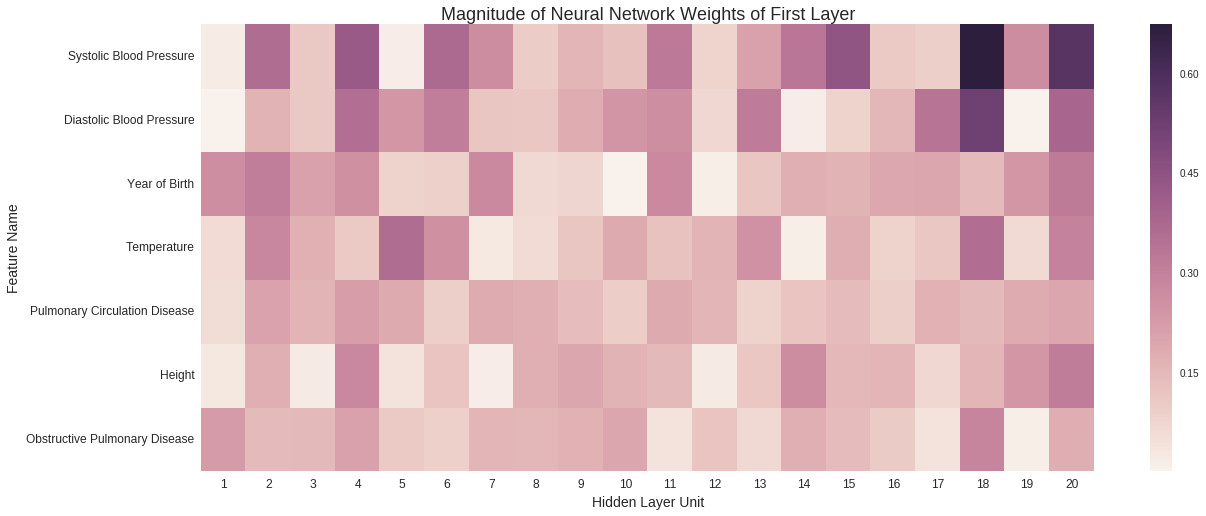

In [13]:
# Plots the 7 most valuable features for predicting hypertension
plt.figure(figsize=(20, 8))

ax = sns.heatmap(weights[:7,:])
ax.set_xticklabels(np.linspace(1, 20, 20).astype(np.int32), fontsize=12)
ax.set_yticklabels(reversed(col), rotation='horizontal', fontsize=12)

plt.title('Magnitude of Neural Network Weights of First Layer', fontsize=18)
plt.ylabel('Feature Name', fontsize=14)
plt.xlabel('Hidden Layer Unit', fontsize=14)

plt.show()

In predicting hypertension (high blood pressure), the neural network weights features that are related to blood more heavily than others. Thus, the neural network is definitely looking at the right features in diagnosing patients.